Tải khung (face detection) vẽ từ github

In [6]:
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/happy-fruit-vietnam/CS2225.2020.N001/master/khung_nhan_dang.xml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  908k  100  908k    0     0  2551k      0 --:--:-- --:--:-- --:--:-- 2551k


Hàm chụp ảnh từ camera

In [15]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='input.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Hàm nhận dạng

In [20]:
import cv2

def face_detection(imageInput='input.jpg', cascPath = 'khung_nhan_dang.xml', imageOutput='output.jpg'):

  # Tạo khung nhận dạng
  faceCascade = cv2.CascadeClassifier(cascPath)

  # Đọc file ảnh và chuyển ảnh về hệ màu xám
  image = cv2.imread(imageInput)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Nhận dạng
  faces = faceCascade.detectMultiScale(
      gray,
      scaleFactor=1.1,
      minNeighbors=5,
      minSize=(30, 30)
      #flags = cv2.CV_HAAR_SCALE_IMAGE
  )

  # In ra xem có bao nhiêu khuôn mặt đã nhận đạng được trong ảnh
  print("Tìm thấy {0} khuôn mặt!".format(len(faces)))

  # Vẽ viền bo quanh các khuôn mặt nhận dạng được
  for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

  # Hiển thị hình ảnh sau khi nhận dạng
  #cv2.imshow("Faces found", image)
  cv2.imwrite(imageOutput, image) 


Show ảnh vừa chụp

<IPython.core.display.Javascript object>

Tìm thấy 1 khuôn mặt!


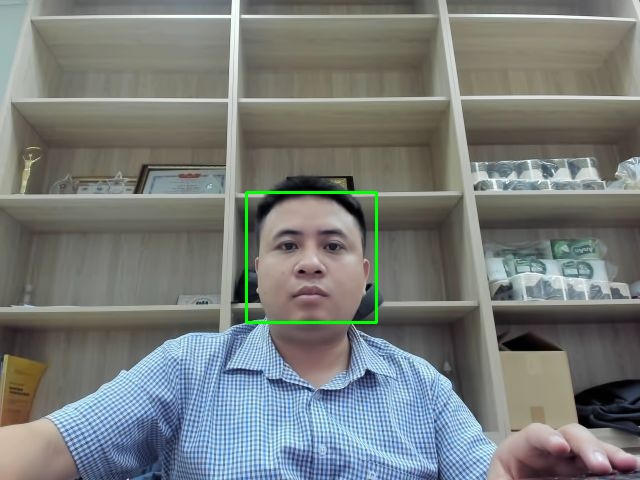

In [23]:
from IPython.display import Image
try:
  filename = take_photo()

  imageInput='input.jpg'
  cascPath = 'khung_nhan_dang.xml'
  imageOutput='output.jpg'

  face_detection(imageInput, cascPath, imageOutput)
  display(Image(imageOutput))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))